In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
module_path = os.path.abspath('src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/ilya/Documents/vein/src


In [2]:
import data
from metrics import mean_iou, jacard_coef, dice_coef,dice_coef_loss
import config
params = config.devbox

/home/ilya/.pyenv/versions/3.5.4/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import load_model
from keras import backend as K
import tensorflow as tf

In [54]:
!ls /home/ilya/Data/veins/output/unet--1520103382

weights-improvement-01-1.45.hdf5  weights-improvement-37-1.71.hdf5
weights-improvement-02-1.56.hdf5  weights-improvement-38-1.67.hdf5
weights-improvement-03-1.43.hdf5  weights-improvement-39-1.62.hdf5
weights-improvement-04-1.51.hdf5  weights-improvement-40-1.70.hdf5
weights-improvement-05-1.65.hdf5  weights-improvement-41-1.80.hdf5
weights-improvement-06-1.67.hdf5  weights-improvement-42-1.75.hdf5
weights-improvement-07-1.70.hdf5  weights-improvement-43-1.50.hdf5
weights-improvement-08-1.70.hdf5  weights-improvement-44-1.60.hdf5
weights-improvement-09-1.66.hdf5  weights-improvement-45-1.59.hdf5
weights-improvement-10-1.70.hdf5  weights-improvement-46-1.68.hdf5
weights-improvement-11-1.68.hdf5  weights-improvement-47-1.77.hdf5
weights-improvement-12-1.74.hdf5  weights-improvement-48-1.74.hdf5
weights-improvement-13-1.76.hdf5  weights-improvement-49-1.79.hdf5
weights-improvement-14-1.54.hdf5  weights-improvement-50-1.79.hdf5
weights-improvement-15-1.64.hdf5  weights-improvement-51-1.74.

In [107]:
with tf.device('/cpu:0'):
    model = load_model('/home/ilya/Data/veins/output/unet--1520103382/weights-improvement-26-1.83.hdf5', {'dice_coef': dice_coef, 'dice_coef_loss': dice_coef_loss, 'jacard_coef': jacard_coef})

In [6]:
train_gen, val_gen = data.make_train_generator(params)

  0%|          | 0/24 [00:00<?, ?it/s]

Loading data
Find 31 train_ids


100%|██████████| 7/7 [00:00<00:00, 182.67it/s]

Data loaded


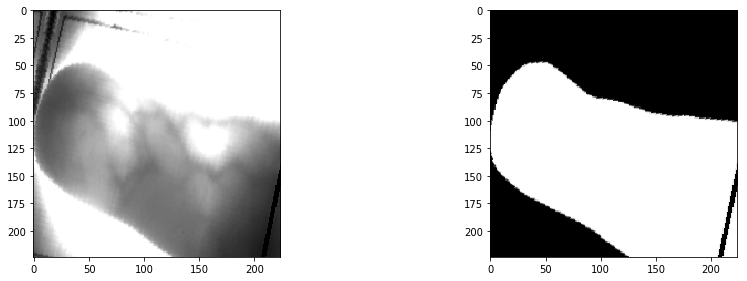

In [7]:
d = next(train_gen)

i = 1
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(d[0][i][:,:,0], cmap='gray')
plt.subplot(222)
plt.imshow(d[1][i][:,:, 0], cmap='gray')

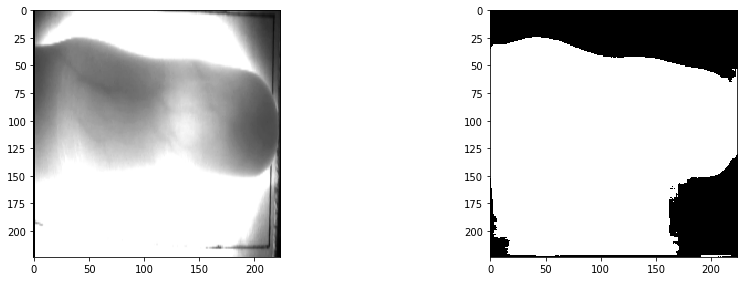

In [112]:
d = next(val_gen)
with tf.device('/cpu:0'):
    mask = model.predict(d[0][i].reshape(1,224,224,1))

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(d[0][i][:,:,0], cmap='gray')
plt.subplot(222)
plt.imshow(mask[0].reshape((224,224)) > 0.95, cmap='gray')